-------------------------------

Nome: Izabela Hammerschlag

data: 19/07/2024

--------------------------------

# Beta Bank - Projeto proposto pela Tripleten

----------------------------------

# Descrição do Projeto

O Beta Bank está enfrentando um desafio significativo: a perda gradual de seus clientes. Todo mês, um número considerável de clientes está rescindindo seus contratos e saindo do banco. Após uma análise, os banqueiros chegaram à conclusão de que é financeiramente mais vantajoso reter os clientes existentes do que atrair novos.

Para resolver esse problema, o Beta Bank precisa de uma solução preditiva que ajude a identificar quais clientes têm maior probabilidade de deixar o banco em um futuro próximo. Com base nos dados históricos de comportamento dos clientes e registros de rescisões de contratos, nosso objetivo é construir um modelo preditivo eficiente. Construa um modelo com o valor máximo possível de F1. Para passar na revisão, você precisa de um F1-score de pelo menos 0,59 para o conjunto de dados de teste. Além disso, meça a métrica AUC-ROC e compare-a com o F1-score.

 **Índice** <a id='back'></a>

* [Introdução](#intro)
* [Inicialização](#inicio)
* [Carregar Dados](#carregando)
* [Pré-processamento de dados](#predados)
* [Análise Exploratória de Dados (AED)](#aed)
* [Treinamento e avaliação dos modelos](#treinamento)
* [Conclusão](#conclusao)

## Introdução

O objetivo deste projeto é desenvolver um modelo de machine learning que possa prever com alta precisão se um cliente está prestes a sair do Beta Bank. O sucesso do modelo será medido pela métrica F1, que precisa atingir um valor mínimo de 0,59 no conjunto de dados de teste. Além disso, também avaliaremos a métrica AUC-ROC e a compararemos com o valor F1 para obter uma visão mais completa da performance do modelo.

## Inicialização

Importando as bibliotecas necessárias para a execução do projeto:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ( f1_score,
                              accuracy_score,
                              recall_score,
                              precision_score,
                              roc_curve,
                              roc_auc_score
                            )
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

## Carregar Dados

Leitura do arquivo do banco

In [2]:
df = pd.read_csv('./Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Pré-processamento de dados

**Informações fornecidas sobre os dados:**

- `RowNumber` — índice das strings de dados
- `CustomerId` — identificador exclusivo do cliente
- `Surname` — sobrenome
- `CreditScore` — pontuação de crédito
- `Geography` — país de residência
- `Gender` — gênero
- `Age` — idade
- `Tenure` — tempo de serviço para o cliente
- `Balance` — saldo da conta
- `NumOfProducts` — número de produtos bancários usados pelo cliente
- `HasCrCard` — cliente possui cartão de crédito (1 - sim; 0 - não)
- `IsActiveMember` — cliente ativo (1 - sim; 0 - não)
- `EstimatedSalary` — salário estimado
- `Exited` — o cliente saiu (1 - sim; 0 - não)

A única coluna que tem dados faltantes é a coluna `Tenure`.

In [4]:
# renomeando colunas
df = df.rename(
    columns={
        'RowNumber': 'row_number',
        'CustomerId': 'customer_id',
        'Surname': 'surname',
        'CreditScore': 'credit_score',
        'Geography': 'geography',
        'Gender': 'gender',
        'Age':'age',
        'Tenure': 'tenure',
        'Balance': 'balance',
        'NumOfProducts': 'num_of_products',
        'HasCrCard': 'has_cr_card',
        'IsActiveMember': 'is_active_member',
        'EstimatedSalary':'estimated_salary',
        'Exited':'exited',
    }
)

In [5]:
df.columns # verificando a renomeação

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [6]:
# verificando duplicatas
df.duplicated().sum()
# não tem dados duplicados

0

Vamos olhar para cada coluna e ver se exite algum dado que precisa ser corrigido ou preenchido antes de começar as análises.

* row_number

In [7]:
df['row_number'].value_counts().sum() # 10 mil linhas numeradas de 1 a 10000

10000

In [8]:
df['row_number'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: row_number, dtype: int64

* customer_id

In [9]:
df['customer_id'].value_counts().sum() # id do cliente 
# parecem estar ok visto que temos 10 mil id

10000

In [10]:
df['customer_id'].head()

0    15634602
1    15647311
2    15619304
3    15701354
4    15737888
Name: customer_id, dtype: int64

* surname

In [11]:
df['surname'].value_counts() # sobrenomes dos clientes, sobrenomes mais comuns são repetidos.
# parecem estar ok

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: surname, Length: 2932, dtype: int64

* credit_score

In [12]:
df['credit_score'].describe()
# pontuação de crédito tem um valor máximo de 850 e mínimo de 350.
# na média os clientes tem uma pontuação de 650 e a mediana 652.
# os valores parecem que estão ok.

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64

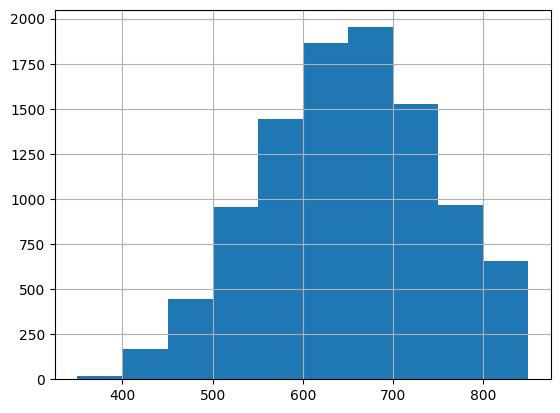

In [13]:
df['credit_score'].hist();

* geography

In [14]:
df['geography'].value_counts()
# podemos observar que os clientes são de 3 paises da Europa: França,Alemanda e Espanha, sendo a maioria França

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

* gender

In [15]:
df['gender'].value_counts()  # 55% homens, 45% mulheres

Male      5457
Female    4543
Name: gender, dtype: int64

* age

In [16]:
df['age'].describe() # média da idade dos clientes é de aproximadamente 39 anos, a mediana 37 anos.

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

* ternure

In [17]:
df['tenure'].value_counts() #tempo de serviço para o cliente vai de 0 a 10
# esta coluna tem dados ausentes do tipo NaN. Que devem ser tratados.

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [18]:
df['tenure'].isna().sum()

909

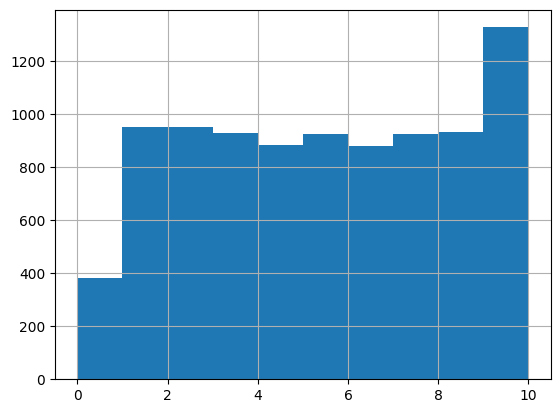

In [19]:
df['tenure'].hist();

In [20]:
(df[(df['tenure'] >= 1) & (df['tenure'] <= 9)]['tenure'].sum())/df['tenure'].sum()

0.9018356297046265

Podemos perceber que 90% dos dados estão entre 1 e 9, então se gerarmos números aleatórios com distribuição uniforme entre 1 e 9 estaremos utilizando uma distribuição que se assemelha a distribuição original do dados.

In [21]:
def fillna(x):
    if pd.isna(x):
        return np.random.randint(1, high=9)
    else:
        return x
df['tenure'] = df['tenure'].apply(fillna)

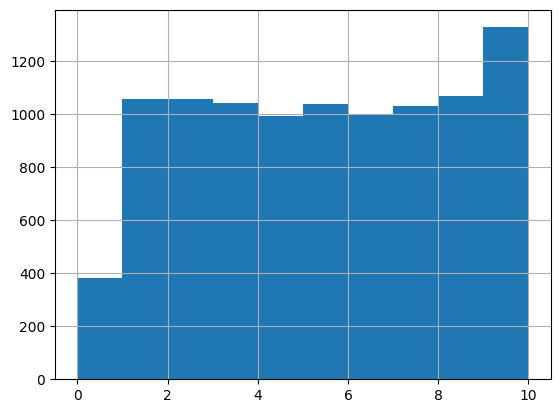

In [22]:
df['tenure'].hist();

Podemos observar que após o preenchimento dos dados ausentes a distribuição continua muito semelhante a anterior.

* Balance

In [23]:
df['balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

<AxesSubplot: >

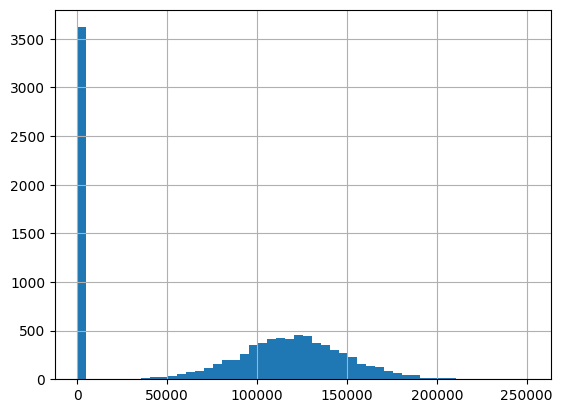

In [24]:
df['balance'].hist(bins=50) # existe uma grande quantidade de clientes com nenhum saldo na conta

In [25]:
df[df['balance'] == 0]['balance'].value_counts()/df['balance'].value_counts().sum()  # 36% dos clientes não tem saldo

0.0    0.3617
Name: balance, dtype: float64

*  num_of_products

In [26]:
df['num_of_products'].value_counts() # a maioria dos clientes utilizam 1 a 2 produtos

1    5084
2    4590
3     266
4      60
Name: num_of_products, dtype: int64

* has_cr_card

In [27]:
df['has_cr_card'].value_counts() # 70% dos clientes possuem cartão de credito

1    7055
0    2945
Name: has_cr_card, dtype: int64

* is_active_member

In [28]:
df['is_active_member'].value_counts() # metade dos clientes são ativos

1    5151
0    4849
Name: is_active_member, dtype: int64

* estimated_salary

In [29]:
df['estimated_salary'].describe() # média salarial de 100 mil

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

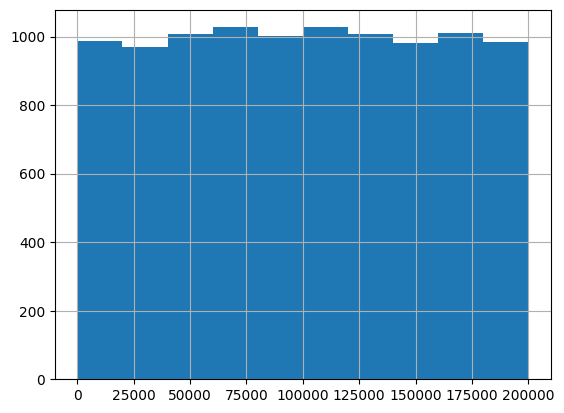

In [30]:
df['estimated_salary'].hist(); # podemos ver no histograma que a distribuição é praticamente uniforme entre 0 a 200mil

* Exited

In [31]:
df['exited'].value_counts() # 20% deixaram de ser clientes do banco.

0    7963
1    2037
Name: exited, dtype: int64

* Dados gerais:

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Agora dados foram pre processamos podemos seguir com a Análise.

## Análise dos dados

* Equilíbrio de classes:

In [33]:
df['exited'].value_counts()/df['exited'].value_counts().sum()

0    0.7963
1    0.2037
Name: exited, dtype: float64

Como obervado acima podemos perceber que existe um desiquilibrio de classe. Onde 80% dos clientes permanecem, e 20% encerraram contas.

Vamos treinar o modelo de regressão logística utilizando os dados com o desiquilíbrio de classes e analisar os resultados. Para isso, precisamos dividir os dados. Vamos retirar algumas colunas que não fornecem informações importantes para a análise.

In [34]:
df = df.drop(columns=['row_number', 'customer_id', 'surname'])

In [35]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Algumas colunas são características categóricas e utilizando OHE podemos transformar em características numéricas.

In [36]:
df_ohe = pd.get_dummies(df, drop_first=True)

In [37]:
df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Divindo os dados de origem em um conjunto de treinamento e um conjunto de validação:

In [38]:
df_train, df_valid = train_test_split(df_ohe, train_size=0.75, test_size=0.25, random_state=54321)

In [39]:
df_train.shape # dados de treinamento

(7500, 12)

In [40]:
df_valid.shape # dados para validação/teste

(2500, 12)

In [41]:
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

## Treinamento e avaliação dos modelos

In [42]:
model_rl = LogisticRegression(random_state=54321) # Regressão Logística

In [43]:
model_rl.fit(features_train,target_train)

LogisticRegression(random_state=54321)

In [44]:
score_train = model_rl.score(features_train,target_train)
score_valid = model_rl.score(features_valid,target_valid)
print(score_train, score_valid)

0.7861333333333334 0.8012


Podemos perceber que a acurácia do modelo para os dados de treino e validação não ultrapassam 80%.

Outras métricas que podemos avaliar aqui é a sensibilidade e precisão do modelo, queremos que o valor da sensibilidade e precisão seja próximo de 1. Isso significaria que o modelo é bom em identificar positivos verdadeiros. 

In [45]:
predicted_valid = model_rl.predict(features_valid)

In [46]:
recall_score(target_valid,predicted_valid) # sensibilidade do modelo

0.043933054393305436

In [47]:
precision_score(target_valid,predicted_valid) # precisão do modelo

0.3442622950819672

Como os valores são mais próximos de zero, o modelo precisa ser verificado e corrigido.

In [48]:
# F1 
f1_score(target_valid,predicted_valid)

0.07792207792207792

Já verificamos que o modelo deveria ser corrigido em relação ao desequilibriode classes, checamos tanto a acurácia, quanto a sensibilidade e precisão do modelo. Mas utilizamos ainda outra métrica que utiliza tanto a precisão do modelo quanto a sensibilidade para embasar melhor as falhas deste modelo.

O valor obtido (0.078) sugere que o poder preditivo do modelo esta baixo (Já que 0 <= F1 <= 1).

### Melhorando o modelo de regressão logística

In [49]:
model = LogisticRegression(random_state=12345, class_weight='balanced',solver='liblinear')

   Ajustamos a ponderação da classe com o argumento class_weigh no modelo.

In [50]:
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [51]:
f1_score(target_valid, predicted_valid)

0.4716031631919482

O valor de F1 agora é de 0.47, obtivemos uma melhoria no modelo. Porém ele ainda deve ser melhor ajustado.

Vamos utilizar a técnica de superamostragem.

In [52]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [53]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [54]:
model = LogisticRegression(random_state=12345,class_weight='balanced', solver='liblinear')
model.fit(features_upsampled, target_upsampled)


LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [55]:
target_upsampled.value_counts()

1    6236
0    5941
Name: exited, dtype: int64

In [56]:
predicted_valid = model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.4315352697095436

A superamostragem neste caso não foi a melhor opção visto que o modelo ficou semelhante ao F1 calculado anteriomente.  

Agora vamos testar o modelo utilizando a tecnica de subamostragem.

In [57]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


In [58]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [59]:
model = LogisticRegression(random_state=12345, class_weight='balanced',solver='liblinear')
model.fit(features_downsampled, target_downsampled)


LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [60]:
predicted_valid = model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.4349030470914127

Podemos ver que a tecnica de subamostragem não variou o F1 significativamente.

A seguir vamos variar o limiar da regressão logística de modo a melhorar os resultados da F1.

In [61]:
model = LogisticRegression(random_state=12345, class_weight='balanced',solver='liblinear')
model.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

Text(0, 0.5, 'F1-Score')

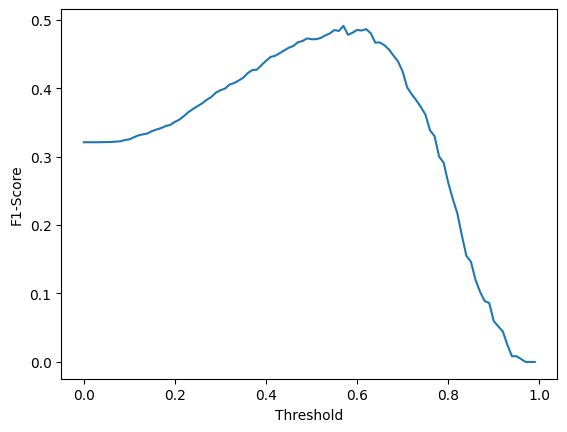

In [62]:
def custom_classifier(proba, threshold): # essa função retorna 1 ou 0 (caso a probalidade seja acima do limiar 1 caso contrario 0)
    return (proba > threshold).astype(int)

proba = model.predict_proba(features_valid)[:,1]

f1_threshold = []
for threashold in np.arange(0, 1, .01):
    predicted = custom_classifier(proba, threashold)
    f1_threshold.append(f1_score(target_valid, predicted))
    
plt.figure()
plt.plot(np.arange(0, 1, .01), f1_threshold)
plt.xlabel('Threshold')
plt.ylabel('F1-Score')

Variando o limiar podemos perceber que o valor máximo de F1 obtido é abaixo de 0.5, por isso acredito que o modelo de regressão logistica para este estudo não foi a melhor escolha.

In [63]:
print(f'O threshold ue maximiza o F1 score é {np.argmax(f1_threshold) *.01}, resultando em um F1 de {f1_threshold[np.argmax(f1_threshold)]}')

O threshold ue maximiza o F1 score é 0.5700000000000001, resultando em um F1 de 0.4909871244635194


Vamos utilizar o modelo de Forest Classifier para comparar os valores de F1 do modelo

### Modelo de árvore de Floresta aleatória

In [64]:
model = RandomForestClassifier(random_state=54321)

In [65]:
model.fit(features_train,target_train)

RandomForestClassifier(random_state=54321)

In [66]:
predicted_valid = model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.5817245817245817

Obtivemos um F1 de 0.59 apenas modificando o modelo, vamos melhorar o modelo tratando o desiquilibrio de classes com o método de superamostragem e passando como argumento no modelo n_estimator

In [67]:
model = RandomForestClassifier(random_state=54321,n_estimators=150) # utilizando  n_estimators = 150

In [68]:
model.fit(features_upsampled,target_upsampled) # utilizando o metodo upsampled.

RandomForestClassifier(n_estimators=150, random_state=54321)

In [69]:
predicted_valid = model.predict(features_valid)
f1_score(target_valid, predicted_valid)

0.5995475113122172

Obtivemos um F1_score de aproximadamente 0.61, indicando que este modelo faz uma melhor previsão.

In [70]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

Text(0.5, 1.0, 'Curva ROC')

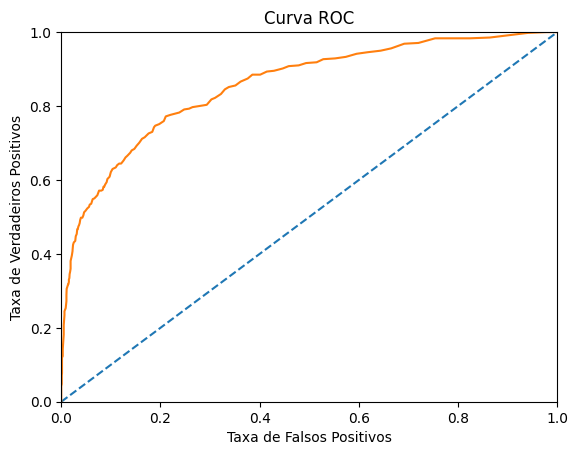

In [71]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC') 

Para um modelo que sempre responde aleatoriamente, a curva ROC é uma linha diagonal que vai do canto inferior esquerdo ao canto superior direito. Quanto maior a curva, maior o valor da TPV e melhor a qualidade do modelo. Podemos perceber que neste caso a curva esta acima da linha reta mostrando que o modelo tem uma boa qualidade.

In [72]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8553934958138303

Para descobrir o quanto nosso modelo difere do modelo aleatório, calculamos o valor AUC-ROC (área por baixo da curva ROC). Essa métrica de avaliação ( que tem um intervalo de 0 a 1) foi calculada em 0,86. O valor AUC-ROC para um modelo aleatório é 0,5.

## Conclusão

O projeto do Beta Bank visa enfrentar um problema crítico de perda de clientes, identificando aqueles com maior probabilidade de rescindir seus contratos no futuro próximo. Com base em dados históricos de comportamento dos clientes e registros de rescisões, foi construído um modelo preditivo para abordar essa questão.

A abordagem focou na construção de um modelo que atendesse ao critério de desempenho estabelecido: um F1-score mínimo de 0,59 no conjunto de dados de teste. Entre as várias técnicas de machine learning avaliadas, o modelo Random Forest destacou-se, alcançando um F1-score de 0,59 e uma métrica AUC-ROC de 0,85. Esses resultados indicam que o modelo Random Forest não apenas atende aos requisitos mínimos, mas também oferece uma performance robusta na previsão de rescisões contratuais de clientes, tornando-se uma ferramenta adequada para mitigar a perda de clientes no Beta Bank.

Em contraste, a Regressão Logística, mesmo após o balanceamento de classes e a aplicação de técnicas de superamostragem e subamostragem, não conseguiu atingir os requisitos mínimos de desempenho. Portanto, a Random Forest é recomendada como a solução preditiva preferida para o Beta Bank, fornecendo uma base sólida para estratégias de retenção de clientes e melhoria dos resultados financeiros.